## Time alignment and Normalization 
in understanding the duration of phonemes or syllables that change due to speaking rate
in Simple It is the process of synchronizing two or more speech signals in time, such that corresponding features (like phonemes or words) occur at the same time in each signal. This is critical for comparing, analyzing, or processing speech data from different sources or speakers.


Normalization: refers to the process of adjusting the speech signal to standardize its features, such as amplitude or duration, ensuring uniformity across signals. 

## Linear time Normalization
is the process of uniformly scaling the time axis of a speech signal to match a standard duration of time frame here LTN assumes the constant scaling factor across the entire signal 

Mathematically lets say we s(t) a speech signal where t is time variable and rescaling factor is given by 

r=T(target)/T(original)


Normalized time is defined by 

t(norm)=t*r
where r is the rescaling factor

resampling the signal 
snorm(t')=s(t/r)


In [138]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [139]:
s1=np.array([0.2,0.4,0.6,0.8,1.0,0.8,0.6,0.4,0.2])
s2=([0.2,0.3,0.5,0.7,0.9,1.0,0.9,0.7,0.5,0.4,0.3,0.2])


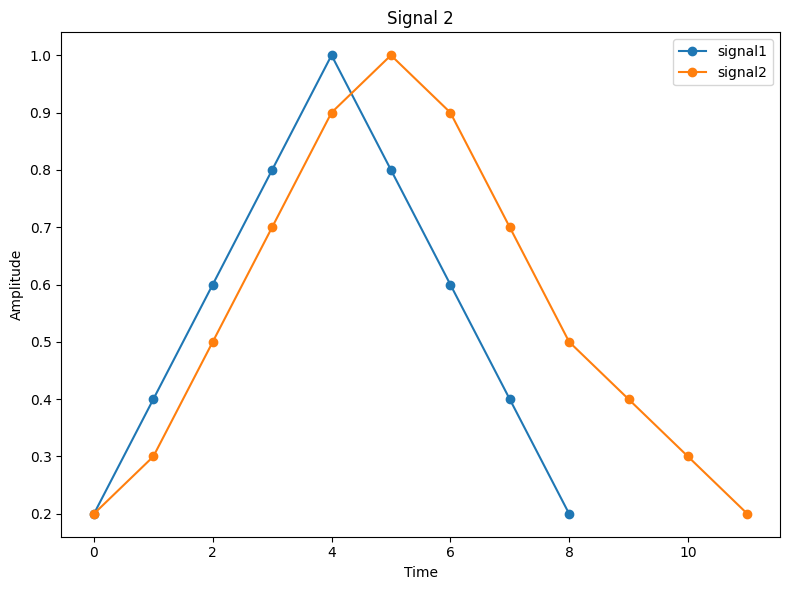

In [140]:
plt.figure(figsize=(8,6))


plt.plot(s1,label='signal1',marker='o')
plt.title("Signal 1")
plt.xlabel('Time')
plt.ylabel('Amplitude')


plt.plot(s2,label='signal2',marker='o')
plt.title("Signal 2")
plt.xlabel('Time')
plt.ylabel('Amplitude')


plt.legend()

plt.tight_layout()
plt.show()

In [141]:
 #(b)Perform Linear Time Normalization for the two sequences.

scaling_fact=np.linspace(0,len(s2)-1,len(s1))
normalized_signal=np.interp(scaling_fact, np.arange(len(s2)),s2)

In [142]:
scaling_fact

array([ 0.   ,  1.375,  2.75 ,  4.125,  5.5  ,  6.875,  8.25 ,  9.625,
       11.   ])

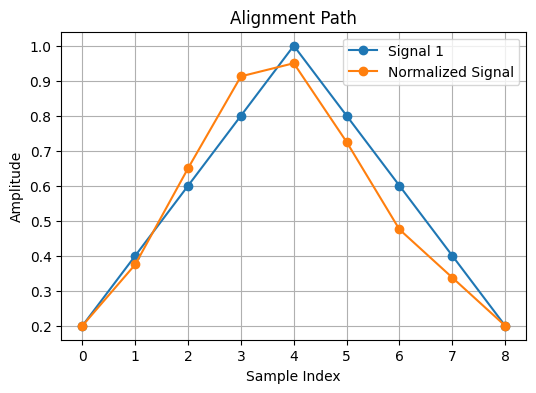

In [143]:
# Plot the alignment path

plt.figure(figsize=(6,4))
plt.plot(s1,label="Signal 1",marker='o')
plt.plot(normalized_signal,label="Normalized Signal",marker='o')
plt.title("Alignment Path")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

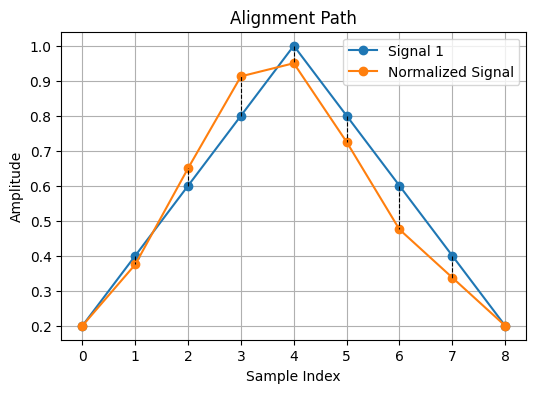

In [144]:
alignment_path=list(zip(s1,normalized_signal))
# Plot the alignment path

plt.figure(figsize=(6,4))
plt.plot(s1,label="Signal 1",marker='o')
plt.plot(normalized_signal,label="Normalized Signal",marker='o')
for i ,(s1,s2) in enumerate(alignment_path):
    plt.plot([i,i],[s1,s2],color='black',linestyle='--', linewidth=0.8)
plt.title("Alignment Path")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

In [146]:
#(e): Discussion
print("Linear Time Normalization aligns Signal 2 to Signal 1 by stretching or compressing it.")
print("The normalized Signal 2 is interpolated to match the length of Signal 1.")
print("Alignment Path (Sample-wise):")
for i, (s1, s2) in enumerate(alignment_path):    print(f"Sample {i + 1}: Signal 1 = {s1}, Normalized Signal 2 = {s2}")

Linear Time Normalization aligns Signal 2 to Signal 1 by stretching or compressing it.
The normalized Signal 2 is interpolated to match the length of Signal 1.
Alignment Path (Sample-wise):
Sample 1: Signal 1 = 0.2, Normalized Signal 2 = 0.2
Sample 2: Signal 1 = 0.4, Normalized Signal 2 = 0.375
Sample 3: Signal 1 = 0.6, Normalized Signal 2 = 0.6499999999999999
Sample 4: Signal 1 = 0.8, Normalized Signal 2 = 0.9125
Sample 5: Signal 1 = 1.0, Normalized Signal 2 = 0.95
Sample 6: Signal 1 = 0.8, Normalized Signal 2 = 0.725
Sample 7: Signal 1 = 0.6, Normalized Signal 2 = 0.475
Sample 8: Signal 1 = 0.4, Normalized Signal 2 = 0.3375
Sample 9: Signal 1 = 0.2, Normalized Signal 2 = 0.2


## Inference

Linear Time Normalization ensures that both signals are of the same length while preserving their respective patterns. This is helpful in comparing signals sampled at different rates or spoken at different speeds.



## LAB - 6-Dynamic Time Warping (DTW) to compare and align two numerical sequences (vectors).

Dynamic Time Warping (DTW): A common method to achieve time alignment. It minimizes the distance between two time series (speech signals) by nonlinearly warping their time axes.



The equation for **Dynamic Time Warping (DTW)** that minimizes the distance between two time series $ X = \{x_1, x_2, ..., x_m\} $ and $ Y = \{y_1, y_2, ..., y_n\} $ is as follows:

$
D_{DTW}(X, Y) = \min_{\mathbf{W}} \sum_{k=1}^{K} d(x_{i_k}, y_{j_k})
$

where:
- $ \mathbf{W} = \{(i_k, j_k)\} $ is the warping path,
- $ d(x_{i_k}, y_{j_k}) $ is the distance metric (commonly Euclidean distance),
- $ K $ is the length of the warping path, and
- $ i_k $ and $ j_k $ are indices of the warping path corresponding to the elements in sequences $ X $ and $ Y $.

This equation seeks to minimize the cumulative distance over the optimal warping path $ \mathbf{W} $.

here after finding the min distance we compute the cost matrix D(i,j)

where the recurrence relation
$
D(i,j)=\text{dist}(X_i, Y_j) + \min \left( D(i-1,j), D(i,j-1), D(i-1,j-1) \right)$


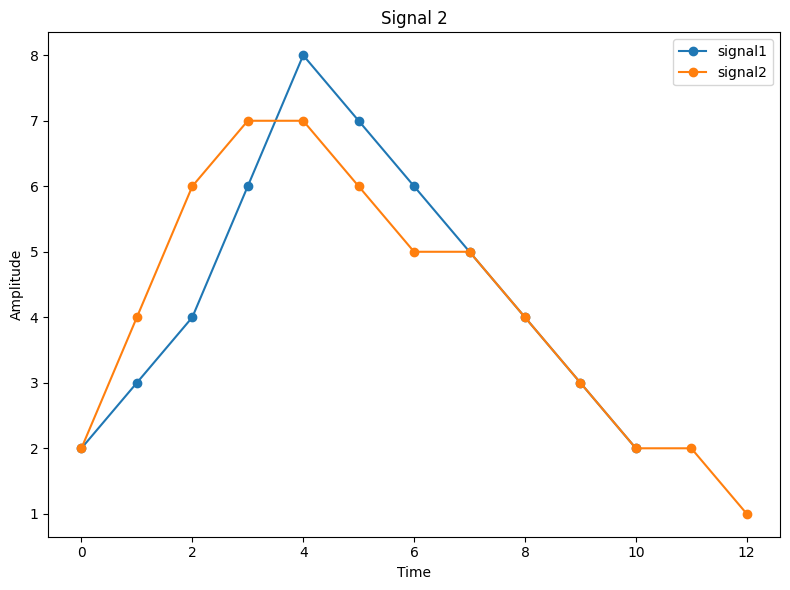

In [148]:
Vector1=np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
Vector2=np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

plt.figure(figsize=(8,6))


plt.plot(Vector1,label='signal1',marker='o')
plt.title("Signal 1")
plt.xlabel('Time')
plt.ylabel('Amplitude')


plt.plot(Vector2,label='signal2',marker='o')
plt.title("Signal 2")
plt.xlabel('Time')
plt.ylabel('Amplitude')


plt.legend()

plt.tight_layout()
plt.show()